In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [2]:
# Carregando o dataset salvo
df = pd.read_csv("dataset.csv")

# Separando variáveis explicativas e alvo
X = df.drop(columns = "y")
y = df.y

In [3]:
X.shape, y.shape

((1000, 10), (1000,))

In [4]:
# Verificando o tipo da variavel e a presença de valores ausentes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   x6      1000 non-null   float64
 6   x7      1000 non-null   float64
 7   x8      1000 non-null   float64
 8   x9      1000 non-null   float64
 9   x10     1000 non-null   float64
dtypes: float64(10)
memory usage: 78.3 KB


In [5]:
# verificando estatisticas de posicao e dispersao da matriz de design
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.454953,0.367987,0.127237,0.463690,-0.072441,0.448445,-0.644697,0.490513,-0.049593,0.018318
std,1.314535,0.730792,2.540803,1.305522,1.020985,1.650863,1.243460,1.118630,1.046667,1.028381
min,-4.756882,-2.837659,-8.804825,-3.844650,-3.031194,-5.680042,-4.242120,-3.058787,-3.582063,-3.254479
25%,-1.301394,-0.073499,-1.506371,-0.370373,-0.774980,-0.654085,-1.452012,-0.244584,-0.731719,-0.678151
50%,-0.527303,0.378512,0.073629,0.406817,-0.039763,0.477497,-0.713939,0.479206,-0.075462,0.034844
75%,0.298079,0.866324,1.710135,1.348829,0.642111,1.494446,0.081702,1.205320,0.663178,0.679153
max,4.390651,2.432286,7.829792,4.337464,3.276399,6.024383,3.912658,5.266161,2.986329,3.089890


In [6]:
# Verificando a proporcao de cada categoria da variavel resposta
y.value_counts()/len(y)

y
0    0.886
1    0.114
Name: count, dtype: float64

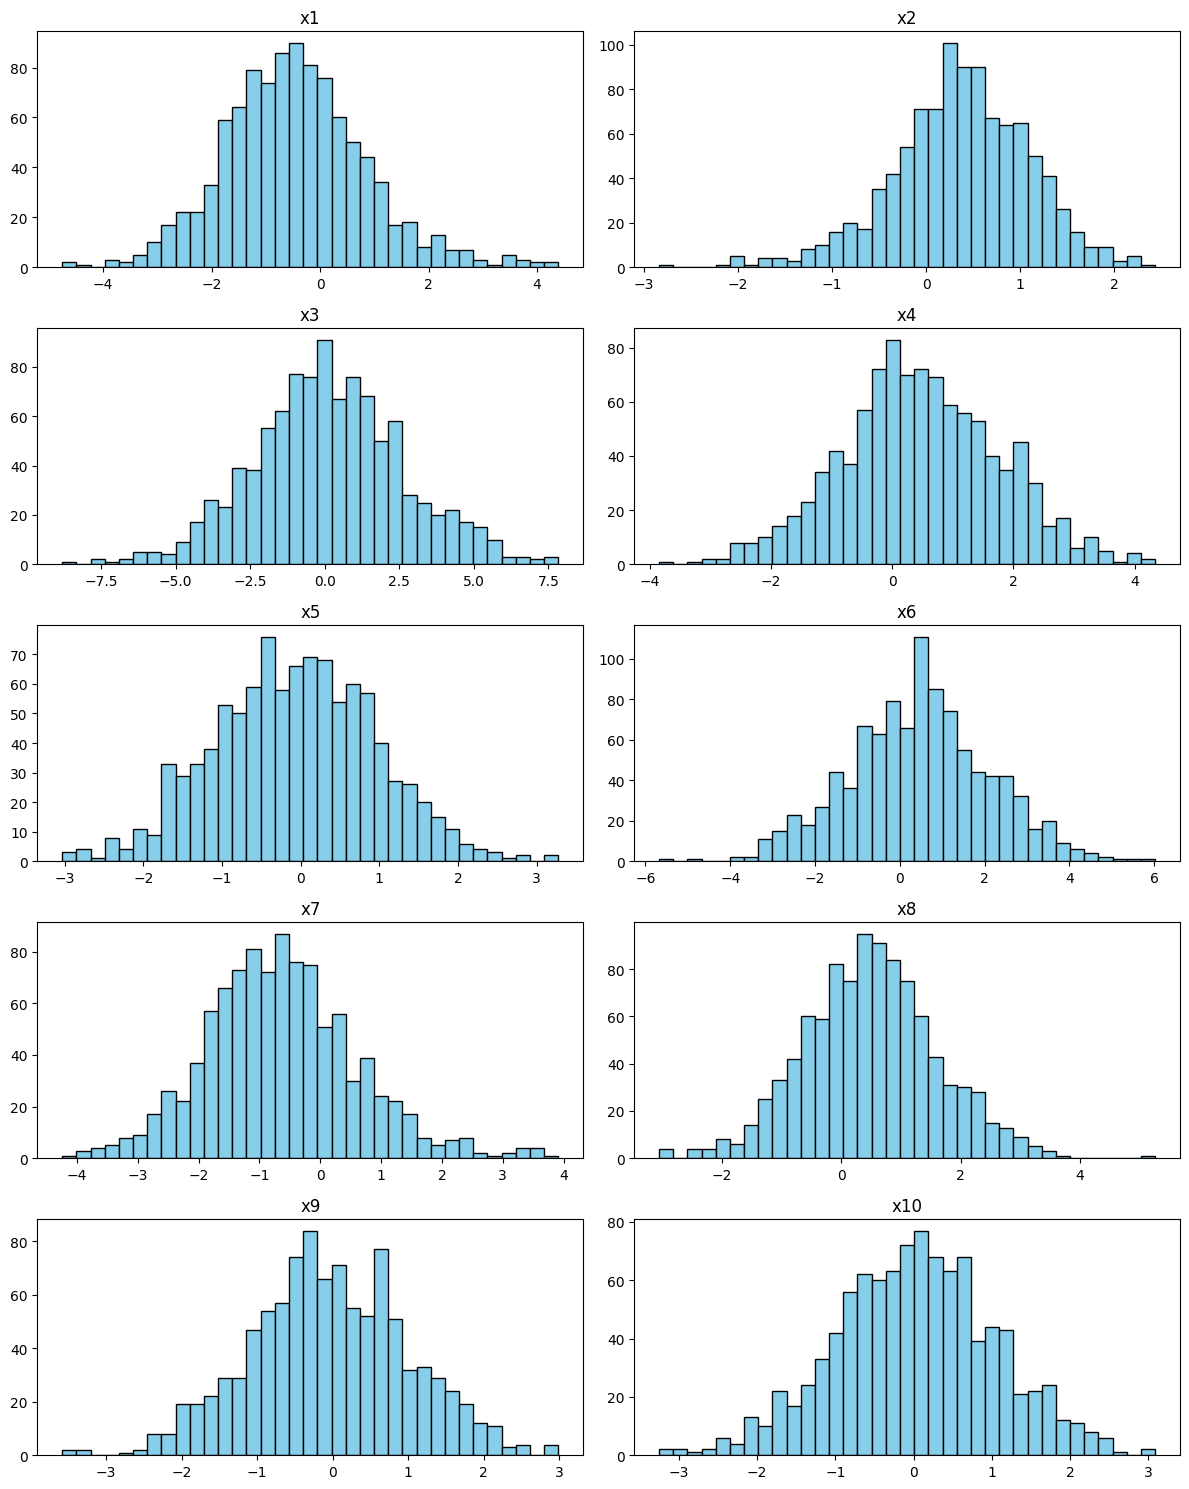

In [7]:
# Subplots com a distribuicao das covariaveis
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.ravel()  # transforma a matriz em vetores

# plotando os histogramas
for i in range(10):
    var = f'x{i+1}'
    axes[i].hist(X[var], bins=35, color='skyblue', edgecolor='black')
    axes[i].set_title(var)

# Remover espaço desnecessário e mostrar
plt.tight_layout()
plt.show()

In [8]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, stratify=y, random_state = 5202) # stratify mantem a proporcao


In [9]:
# Treinando modelo de regressão logística
modelo = LogisticRegression(random_state=5202)
modelo.fit(X_train, y_train)

LogisticRegression(random_state=5202)

In [10]:
# Gerando previsões com threshold 0.5
y_proba = modelo.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

In [11]:
# Construindo matriz de confusão
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz)

# [VN FP]
# [FN VP]

Matriz de Confusão:
[[309   1]
 [ 26  14]]


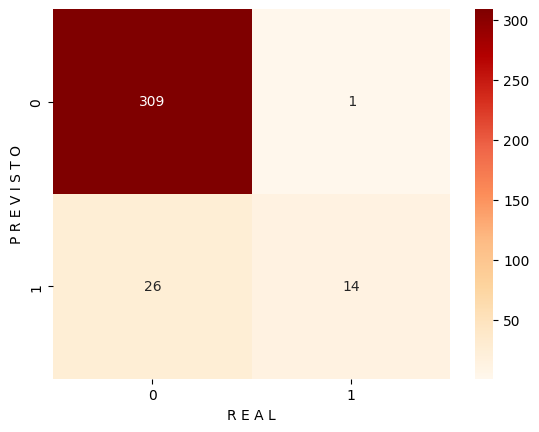

In [12]:
# plotando matriz de confusao
sns.heatmap(matriz, cmap = 'OrRd', annot = True, fmt = '2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [13]:
# calculando manualmente as metricas Recall e Precision
Recall = matriz[1][1]/(matriz[1][1] +  matriz[1][0]) # Sensitivity
Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV

# F1-score
F1 = 2*Recall*Precision/(Recall + Precision) 

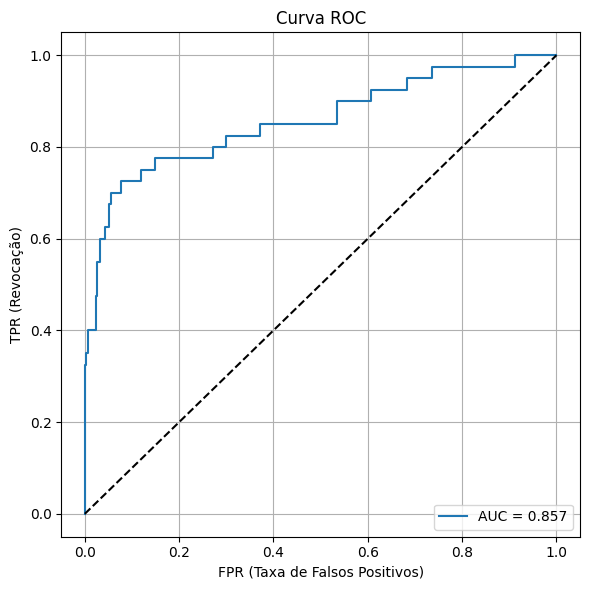

In [14]:
# Plotando curva ROC e calcular AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_8284\2414575496.py:18: RuntimeWarning: invalid value encountered in scalar divide
  Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
C:\Users\Diego\AppData\Local\Temp\ipykernel_8284\2414575496.py:18: RuntimeWarning: invalid value encountered in scalar divide
  Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
C:\Users\Diego\AppData\Local\Temp\ipykernel_8284\2414575496.py:18: RuntimeWarning: invalid value encountered in scalar divide
  Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV


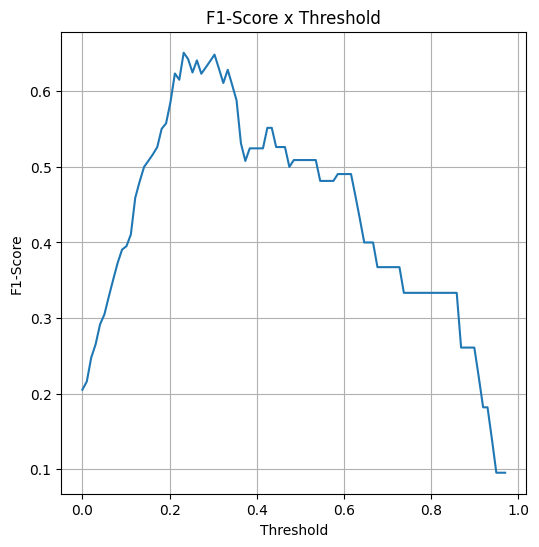

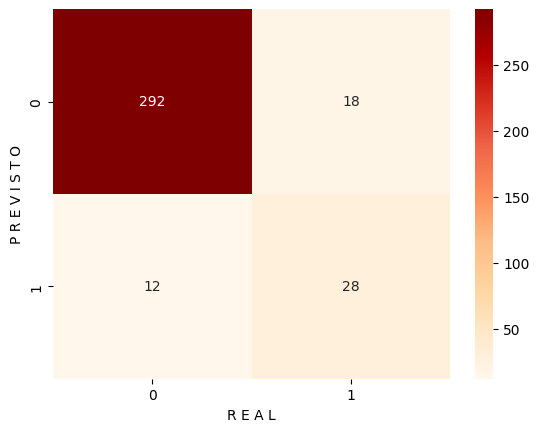

In [15]:
# encontrando o melhor threshold com base no F1-score
# Criendo uma lista de thresholds entre 0 e 1
thresholds = list(np.linspace(0, 1, 100))
Recall_list = []
Precision_list = []
F1_list = []
Acuracia_list = []

# Para cada threshold, calcule as previsões binárias e a matriz de confusão
# Guarde o F1-score para cada threshold
for num in thresholds:
    y_pred = (y_proba >= num).astype(int)
    matriz = confusion_matrix(y_test, y_pred)

    Recall = matriz[1][1]/(matriz[1][1] +  matriz[1][0]) # Sensitivity
    Recall_list.append(Recall)

    Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
    Precision_list.append(Precision)
    
    F1 = 2*Recall*Precision/(Recall + Precision) 
    F1_list.append(F1)

    Acuracia = (matriz[0][0] + matriz[1][1])/len(y)
    Acuracia_list.append(Acuracia)

# DataFrame para armazenamento dos resultados
df = pd.DataFrame({"thresholds": thresholds,
            "Recall": Recall_list,
            "Precision": Precision_list,
            "F1-score": F1_list,
            "Acurácia": Acuracia_list})   
df.dropna(inplace=True)

# Plotando o gráfico do F1-score em função do threshold
plt.figure(figsize=(6, 6))
plt.plot(df["thresholds"],df['F1-score'])
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score x Threshold")
plt.grid(True)
plt.show()
# Isso ajuda a visualizar qual valor produz o melhor equilíbrio entre precisão e recall

# Escolhendo o melhor threshold e refazendo a matriz de confusão final
best_threshold_idx = df["F1-score"].idxmax()

y_pred = (y_proba >= df['thresholds'][best_threshold_idx]).astype(int)

sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'OrRd', annot = True, fmt = '2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()


In [16]:
# encontrando os valores das métricas obtidas pelo melhor corte
df.loc[df['F1-score'] == df['F1-score'].max()]

,thresholds,Recall,Precision,F1-score,Acurácia
23,0.232323,0.7,0.608696,0.651163,0.32


## Testando para outra semente e com 30% da amostra como teste

In [23]:
#  Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 142)

# Treinando modelo de regressão logística
modelo = LogisticRegression(random_state=142)
modelo.fit(X_train, y_train)

# Gerando previsões com threshold 0.5
y_proba = modelo.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# Construindo matriz de confusão
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz)

# [VN FP]
# [FN VP]

Matriz de Confusão:
[[263   3]
 [ 22  12]]


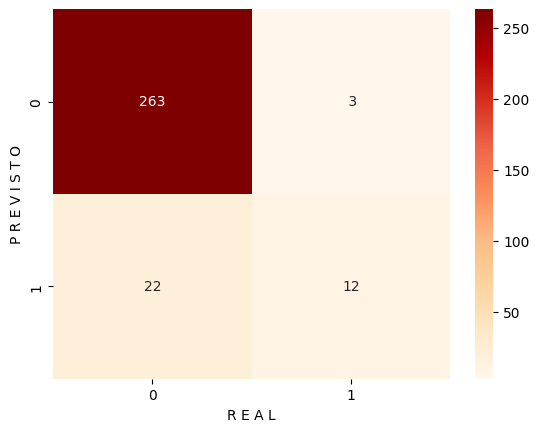

In [24]:
sns.heatmap(matriz, cmap = 'OrRd', annot = True, fmt = '2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()


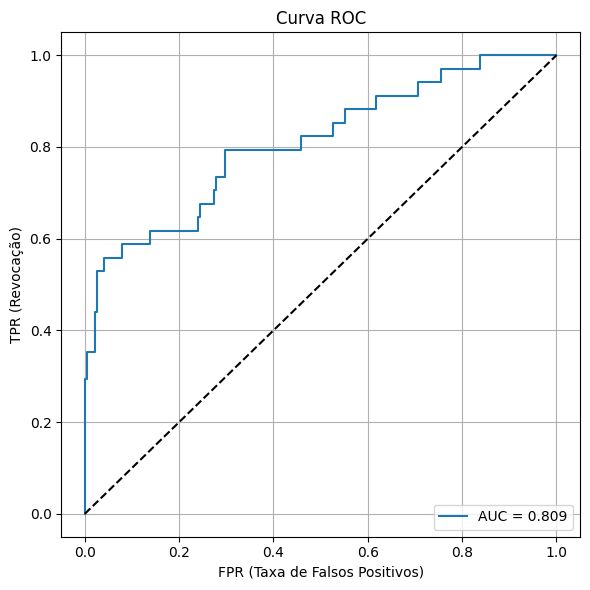

In [25]:
# Plotando curva ROC e calculando AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculando as métricas Recall e Precision
Recall = matriz[1][1]/(matriz[1][1] +  matriz[1][0]) # Sensitivity
Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
# F1-score
F1 = 2*Recall*Precision/(Recall + Precision)

C:\Users\Diego\AppData\Local\Temp\ipykernel_8284\1661579578.py:17: RuntimeWarning: invalid value encountered in scalar divide
  Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
C:\Users\Diego\AppData\Local\Temp\ipykernel_8284\1661579578.py:17: RuntimeWarning: invalid value encountered in scalar divide
  Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV


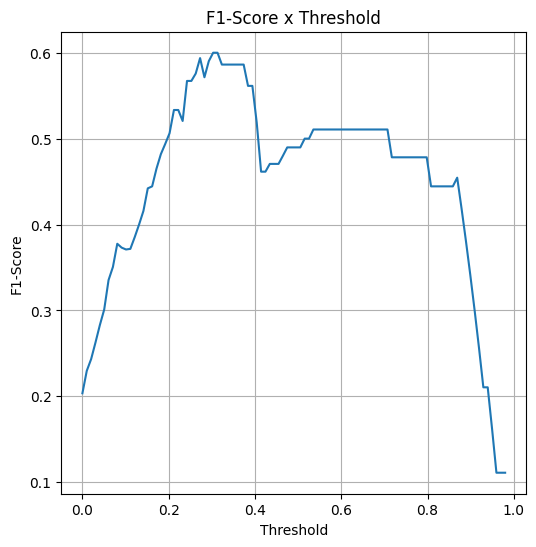

In [26]:
#  encontrando o melhor threshold com base no F1-score

# a) Criando uma lista de thresholds entre 0 e 1 
thresholds = list(np.linspace(0, 1, 100))
Recall_list = []
Precision_list = []
F1_list = []
Acuracia_list = []

for num in thresholds:
    y_pred = (y_proba >= num).astype(int)
    matriz = confusion_matrix(y_test, y_pred)

    Recall = matriz[1][1]/(matriz[1][1] +  matriz[1][0]) # Sensitivity
    Recall_list.append(Recall)

    Precision = matriz[1][1]/(matriz[1][1] +  matriz[0][1]) # PPV
    Precision_list.append(Precision)
    
    F1 = 2*Recall*Precision/(Recall + Precision) 
    F1_list.append(F1)

    Acuracia = (matriz[0][0] + matriz[1][1])/len(y)
    Acuracia_list.append(Acuracia)

# Armazenando os valores em um DataFrame
df = pd.DataFrame({"thresholds": thresholds,
            "Recall": Recall_list,
            "Precision": Precision_list,
            "F1-score": F1_list,
            "Acurácia": Acuracia_list})   
df.dropna(inplace=True)

# e) Plotando o gráfico do F1-score em função do threshold
plt.figure(figsize=(6, 6))
plt.plot(df["thresholds"],df['F1-score'])
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score x Threshold")
plt.grid(True)
plt.show()

# Isso ajuda a visualizar qual valor produz o melhor equilíbrio entre precisão e recall
# Escolhendo o melhor threshold e refaça a matriz de confusão final
best_threshold_idx = df["F1-score"].idxmax()
y_pred = (y_proba >= df['thresholds'][best_threshold_idx]).astype(int)


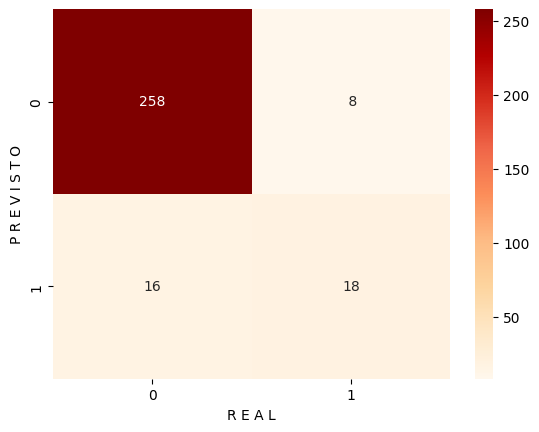

,thresholds,Recall,Precision,F1-score,Acurácia
30,0.303030,0.529412,0.692308,0.6,0.276
31,0.313131,0.529412,0.692308,0.6,0.276


In [ ]:
# plotando a matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'OrRd', annot = True, fmt = '2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

# identificando os valores das métricas obtidas pelo melhor threshold
df.loc[df['F1-score'] == df['F1-score'].max()]

In [28]:
df.loc[df['Acurácia'] == df['Acurácia'].max()]

,thresholds,Recall,Precision,F1-score,Acurácia
53,0.535354,0.352941,0.923077,0.510638,0.277
54,0.545455,0.352941,0.923077,0.510638,0.277
55,0.555556,0.352941,0.923077,0.510638,0.277
56,0.565657,0.352941,0.923077,0.510638,0.277
57,0.575758,0.352941,0.923077,0.510638,0.277
58,0.585859,0.352941,0.923077,0.510638,0.277
59,0.595960,0.352941,0.923077,0.510638,0.277
60,0.606061,0.352941,0.923077,0.510638,0.277
61,0.616162,0.352941,0.923077,0.510638,0.277
62,0.626263,0.352941,0.923077,0.510638,0.277


# Conclusão
Como nossa variável resposta é desbalanceada, com 88,6% dos dados da classe 0 e 11,4% dos dados da classe 1, então utilizar a acurácia como métrica decisiva para a avaliação do modelo não retorna bons resultados, uma vez que ao classificarmos todos os elementos como pertencentes a classe 0, temos uma acurácia alta e isso não condiz com a realidade dos dados. 

Uma maneira de avaliar nesse caso é utilizando o F1-Score, que é calculado utilizando as métricas de sensibilidade (Recall) e valor preditivo positivo (Precision). Além disso, considerar diversos valores de cortes e encontrar o melhor valor deles em relação ao F1-score para a decisão na predição também ajuda a controlar o trade-off viés e variância e assim retornar o modelo logístico que desempenha melhor nesse conjunto de dados.